# 0. Quick overview of Python, Jupyter, and some of their features

We will go through the basics features of Python and Jupyter in order to plot, create datasets, use dataframes, and do fits.

If you have never used Jupyter: Jupyter notebooks are a very cool and practical way of doing "simple analysis" and teaching. It allows an interactive framework to use Python, and at the same time allows the insertion fo comments and descriptions like the one you are reading now.

This kind of cell is known as a MARKDOWN cell. Apart from this kind of cell, there is the more useful one for analysis: the CODE cell, like the following in which we import the necessary libraries of Python that we will use today.

In [1]:
import matplotlib                     # as the name says is a library for plotting in Python
import matplotlib.pyplot as plt
import numpy as np                    # library of numerical python functions
import pandas as pd                   # library for data handling and data formats
import scipy.stats as ss              # library of statistical methods
from scipy.optimize import curve_fit  # function for fitting
import uproot                         # library to read .root files "whithout ROOT"

## 0.1 Creating histograms and filling them

In this section we give a quick look to histograms and binning.
There are two main methods you can use in python to deal with a histogram (i.e. a binned series):
 * `plt.hist(series, bins)`: you use this method in case you want to plot directly the histogram. This methods returns `n`, the values of the histogram bins, `bins`, the edges of the bins and `patches`, silent list of individual patches used to create the histogram or list of such list if multiple input datasets (patches are almost never used).
 * `np.hisogram(series, bins)`: compute the histogram of a set of data. This method returns `hist`, the values of the histogram and `bin_edges`, the bin edges `(length(hist)+1)`.

Let's create some dummy data.

We start by creating an array of $10^5$ random numbers, generated according to a `crystallball distribution`. Then we create two histograms using both `plt.hist()` and `np.histogram()`.

In [2]:
# generate the values distributed as a gaussian
beta, m = 0.4, 5 
cb_vals = ss.crystalball.rvs(beta, m, size=10000)

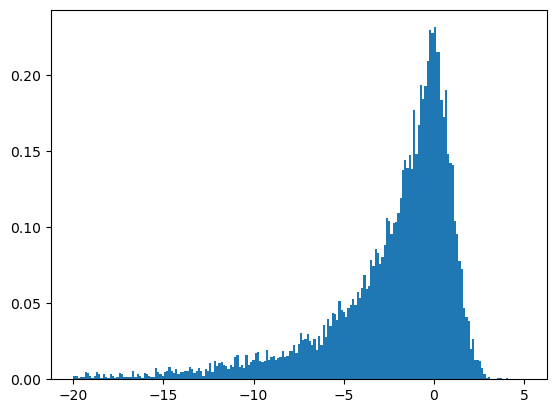

In [3]:
binning = np.linspace(-20, 5, 200)
n, bins, patches = plt.hist(cb_vals, binning, density=True)

Calling `plt.hist` automatically plots the histogram of the series we are providing to this method. Also note that it is preferable to assing `plt.hist()` to a variable, otherwise you also get the printout of all the contents in each bin. For example, try to run:

(array([  3.,   3.,   1.,   2.,   2.,   6.,   5.,   3.,   1.,   3.,   6.,
          4.,   1.,   4.,   2.,   1.,   4.,   3.,   1.,   2.,   5.,   4.,
          2.,   2.,   2.,   2.,   7.,   2.,   4.,   3.,   1.,   5.,   4.,
          3.,   2.,   2.,   9.,   6.,   4.,   3.,   6.,   7.,  10.,   7.,
          5.,   8.,   4.,   6.,   6.,   7.,   7.,  10.,   8.,   5.,   7.,
          9.,   7.,   3.,   8.,   7.,  13.,   6.,  15.,  11.,  13.,  14.,
         12.,  11.,   8.,  12.,  10.,  18.,  20.,  10.,  12.,   9.,  20.,
         12.,  14.,  16.,  21.,  22.,  15.,  14.,  15.,  24.,  16.,  18.,
         19.,  16.,  17.,  18.,  23.,  18.,  19.,  23.,  23.,  28.,  21.,
         29.,  38.,  32.,  33.,  37.,  31.,  28.,  33.,  24.,  35.,  28.,
         44.,  34.,  49.,  43.,  54.,  53.,  48.,  64.,  56.,  55.,  51.,
         58.,  60.,  65.,  60.,  71.,  66.,  74.,  85.,  73.,  76.,  97.,
         92., 106., 103.,  94.,  99., 109., 131., 129., 118., 127., 128.,
        135., 147., 170., 178., 172., 

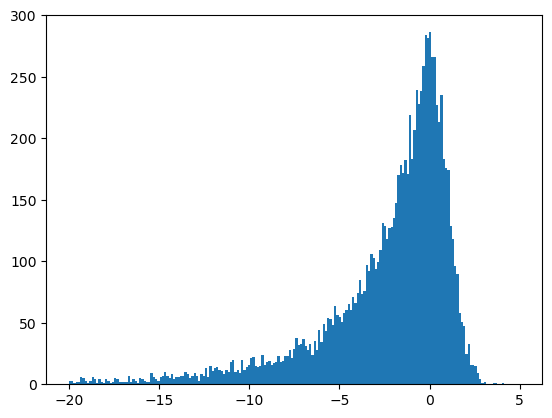

In [4]:
plt.hist(cb_vals, binning)

Therefore, if we do not directly need to see the histogram, it is better to use `np.hisogram` (especially if you do not want the plots to appear and make your notebook longer and longer).

In [5]:
hist, bin_edges = np.histogram(cb_vals, bins,  density=True)

It is worth mentioning that the bins edges returned by the two methods have length larger than the values of the histogram. Therefore, we need to remove the overflow bin when we want to plot `bins` vs `n` (or `bin_edges` vs `hist`):

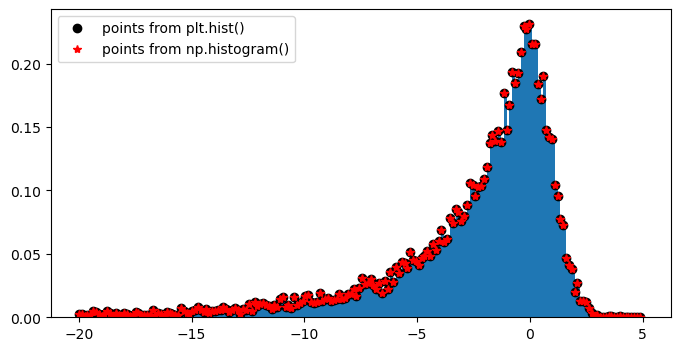

In [6]:
plt.figure(figsize=(8,4))
t = plt.hist(cb_vals, binning,  density=True)
plt.plot(bins[:-1], n, 'ko', label = 'points from plt.hist()')
plt.plot(bin_edges[:-1], hist, 'r*', label = 'points from np.histogram()')
plt.legend()

Last but not least, the bins edges above do not correspond to the bins centers. This is why in the plot above, the points are not aligned with the histogram. Let's define the bin centers and then use these points to fit the above distribution with a gaussian:

In [7]:
bins = (bins[:-1] + bins[1:])/2
bin_edges = (bin_edges[:-1] + bin_edges[1:])/2

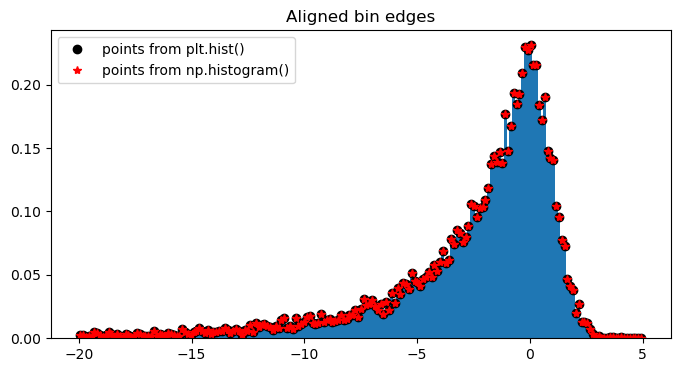

In [8]:
plt.figure(figsize=(8,4))
plt.title('Aligned bin edges')
t = plt.hist(cb_vals, binning,  density=True)
plt.plot(bins, n, 'ko', label = 'points from plt.hist()')
plt.plot(bin_edges, hist, 'r*', label = 'points from np.histogram()')
plt.legend()

## 0.2 Fitting histograms 

Having generated a distribution we can fit it with a user-defined function, using the `curve_fit` method with a user defined function. Let's start by defining the `gaussian` function:

In [9]:
def gaussian(x, A, sigma, mu):
    return A/(sigma * np.sqrt(2 * np.pi))*np.exp( - (x - mu)**2 / (2 * sigma**2) )

Now let's fit the distributuin with a gaussian. 

`curve_fit` expects 3 arguments:
 * The fit function, in our case `gaussian`;
 * The `x` and `y` arrays of data;

For more options (such as setting initial guess for the free parameters, including uncertainties to the fit and boundaries on the fit free parameters) you can have a look at the [`curve_fit` documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html).

In [10]:
popt, pcov = curve_fit(gaussian, bins, n)

The fit results are:
 * `popt`: Optimal values for the parameters so that the sum of the squared residuals of `f(xdata, *popt) - ydata` is minimized;
 * `pcov`: The estimated covariance of popt. The diagonals provide the variance of the parameter estimate. To compute one standard deviation errors on the parameters use `perr = np.sqrt(np.diag(pcov))`.

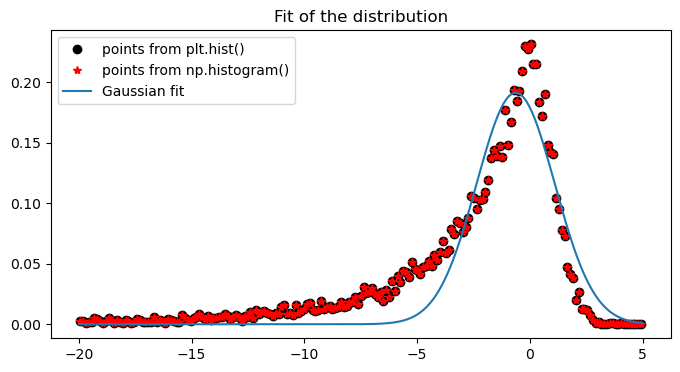

In [11]:
plt.figure(figsize=(8, 4))
plt.title('Fit of the distribution')
plt.plot(bins, n, 'ko', label = 'points from plt.hist()')
plt.plot(bin_edges, hist, 'r*', label = 'points from np.histogram()')
plt.plot(binning, gaussian(binning, *popt), '-', label = 'Gaussian fit')
plt.legend()

As we would expect the `gussian` does not fit well the daat. Therefore we we have to use the `crystalball.fit` fitting. As input it takes:
* the data to be fitted (`cb_vals`)
* the starting guess of the parameters to fit: in our case we start guessing the normalization with `scale=1`
Complete documentation can be found [here](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.crystalball.html)

In [12]:
beta_fit, m_fit, offset_fit, norm_fit = ss.crystalball.fit(cb_vals, scale=1)
print("MLE beta =", beta_fit, "; MLE m =", m_fit, "; MLE offset =", offset_fit, "; MLE norm =", norm_fit)

/home/llr/cms/mchiusi/software/miniconda3/envs/testenv/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:2781: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu


MLE beta = 0.40241774783189505 ; MLE m = 4.904246521696285 ; MLE offset = -0.035782873105369525 ; MLE norm = 1.0098804633315903


The output of the fitting is the Maximum Likelihood Estimate (MLE) of the parameters of the `crystallball` distribution. Now we can plot it to visually confront the result of teh fit with the original distribution we created.

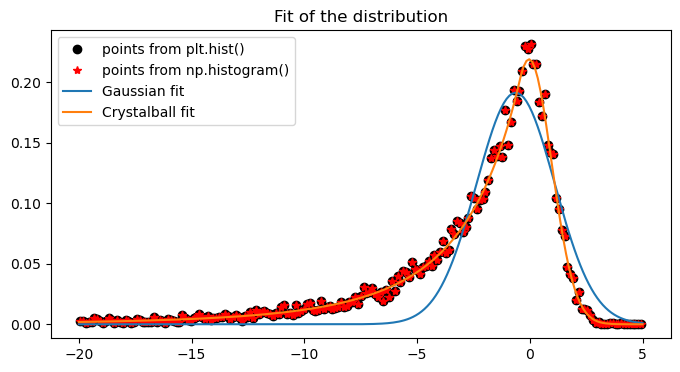

In [13]:
plt.figure(figsize=(8, 4))
plt.title('Fit of the distribution')
plt.plot(bins, n, 'ko', label = 'points from plt.hist()')
plt.plot(bin_edges, hist, 'r*', label = 'points from np.histogram()')
plt.plot(binning, gaussian(binning, *popt), '-', label = 'Gaussian fit')
rv = ss.crystalball(beta_fit, m_fit, offset_fit, norm_fit)
plt.plot(binning, rv.pdf(binning), '-', label = 'Crystalball fit')
plt.legend()

## 0.3 Dataset handling

First of all, let's import the dataset we are going to use.
Normally HEP data come in the `.root` format, which was born to be directly usable with the [`ROOT` framework](https://root.cern.ch/). We are going to open it into a `pandas` data frame, using [`uproot`](https://github.com/scikit-hep/uproot) to import the ROOT `TTree`.
We also have to define a `key`, which is the name of the `TTree` we want to open.

In [14]:
tree = uproot.open('plots_paper_2018.root')['sr_lowZ/VBS_OS/tree_WWewk']
df = tree.arrays(['pt_1l','pt_2l','pt_1j','eta_1j'], library = 'pd')

In [15]:
df.head()

,pt_1l,pt_2l,pt_1j,eta_1j
0,185.838654,168.203842,776.513000,-1.270996
1,157.042480,72.731941,132.049515,-2.045898
2,246.139847,43.182053,204.169418,-1.878662
3,60.415462,58.607910,144.991211,-2.769043
4,74.205643,22.891127,195.250000,-3.109375


### 0.3.1 Selecting events in dataframes

Now that you have in mind the structure of the data frame, we can get some pandas basics knowledge. Let's say we want to look at all the entries in our `df` where the `pt_1l` is larger than 25GeV. In pandas this can be quickly done with a `query` on the `df`:

In [16]:
# we ask for head() because df[sel] is still a df
sel = df['pt_1l'] > 25
df[sel].head()

,pt_1l,pt_2l,pt_1j,eta_1j
0,185.838654,168.203842,776.513000,-1.270996
1,157.042480,72.731941,132.049515,-2.045898
2,246.139847,43.182053,204.169418,-1.878662
3,60.415462,58.607910,144.991211,-2.769043
4,74.205643,22.891127,195.250000,-3.109375


Here we have learnt how to apply a boolean selection to a data frame. The `sel` object is a pandas Series made of `True` and `False` entries according to whether the selection (`df['pt_1l'] > 25`) is satisfied or not:

In [17]:
sel.head()

0    True
1    True
2    True
3    True
4    True
Name: pt_1l, dtype: bool

We can also combine multiple selections and create a new df starting from the original one, but with a selection applied on data. Something like this:

In [18]:
## We define some selections
sel_energy = df['pt_1l'] > 50
sel_eta = df['eta_1j'] < 2.3

## We combine the selection together.
## Note that python uses the single & (or | ).
sel_tot = sel_energy & sel_eta

## We create a new df with only the events
## we are interested on.
df_cut = df[sel_tot]

Let's now check the difference in length between these two data frames:

In [19]:
len(df)

10365

In [20]:
len(df_cut)

7359